In [70]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'

data = pd.read_csv(workdir + 'vel_230504.csv')


In [71]:
# for name in data.columns[2:]:
#     x = data[name][310:410]  - data[data.columns[1]][310:410]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y


for name in data.columns[1:]:
    y = data[name][360-190] 
    data[name] = data[name] - y


In [72]:
data.columns

Index(['Wavelength [nm]', 'H2O_396', 'vel_0.5', 'vel_1', 'vel_1.5', 'vel_2',
       'vel_2.5', 'vel_3', 'vel_3.5', 'vel_4', 'prot_1', 'prot_2', 'prot_3',
       'prot_4', 'prot_6', 'prot_8', 'prot_10', 'prot_12', 'prot_16',
       'prot_20', 'prot_24', 'prot_28', 'prot_32', 'prot_36', 'prot_42',
       'prot_48', 'prot_54', 'prot_60'],
      dtype='object')

(-0.05, 0.2)

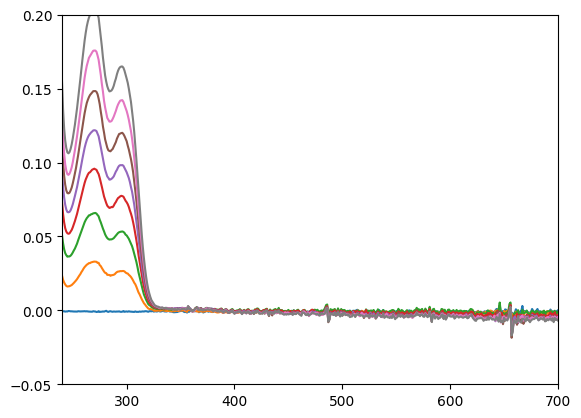

In [73]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:9]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 700])
plt.ylim([-0.05, 0.2])

312
[[0.        ]
 [0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
0.9984954398775467
0.0010565326264066477
[8.02443575]


(-0.05, 0.1)

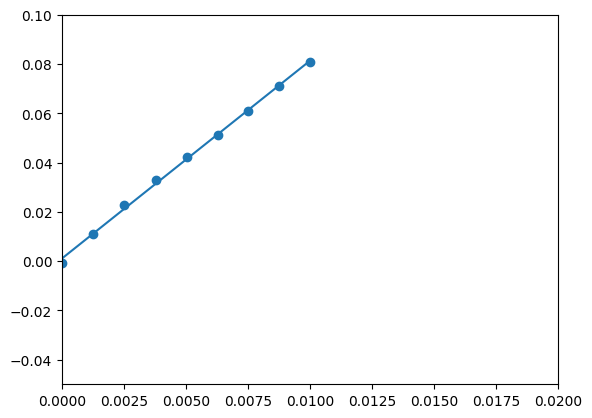

In [74]:

vel_xs = [0/396, 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]
vel_ys = data.iloc[312-190, 1:10]


print(data.iloc[312-190, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
vel_xs_re = np.array(vel_xs).reshape(-1, 1)
vel_reg_313 = LinearRegression().fit(vel_xs_re, vel_ys)
print(vel_xs_re)
print(vel_reg_313.score(vel_xs_re, vel_ys))
print(vel_reg_313.intercept_)
print(vel_reg_313.coef_)

fig,ax = plt.subplots()
ax.scatter(vel_xs, vel_ys)
vel_ys_313_pred = np.array([vel_reg_313.predict(np.array(xr).reshape(1, -1)) for xr in vel_xs_re])

ax.plot(vel_xs_re, vel_ys_313_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.1])


(-0.05, 0.3)

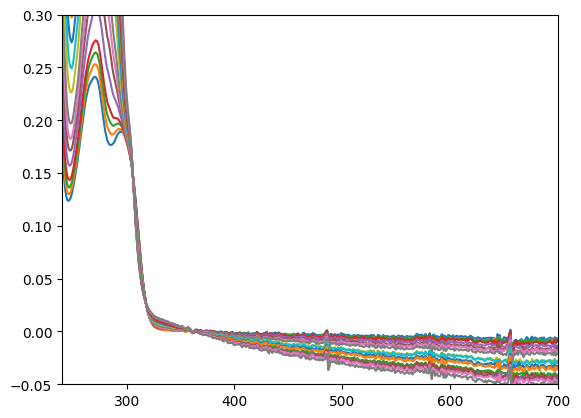

In [75]:
fig,ax = plt.subplots()
for name in data.columns[10:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 700])
plt.ylim([-0.05, 0.3])

In [76]:
prot599 = pd.read_csv(workdir + 'ProteinConc/20230504_prot_conc_599.csv')

prot599.columns

Index(['Wavelength [nm]', 'H2O', 'prot_2', 'prot_4', 'prot_6', 'prot_8',
       'prot_10', 'prot_12', 'prot_14'],
      dtype='object')

In [77]:
# for name in prot599.columns[2:9]:
#     print(name)
#     x = prot599[name][310:410]  - prot599[prot599.columns[1]][310:410]
#     y = sum(x)/len(x)
#     prot599[name] = prot599[name] - y


for name in prot599.columns[1:9]:
    y = prot599[name][360-190] 
    prot599[name] = data[name] - y

KeyError: 'H2O'

H2O       -0.000400
prot_2     0.034327
prot_4     0.066293
prot_6     0.104021
prot_8     0.143050
prot_10    0.183493
prot_12    0.220744
prot_14    0.260008
Name: 90, dtype: float64
[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946, 0.024509803921568627, 0.02926829268292683, 0.03398058252427184]


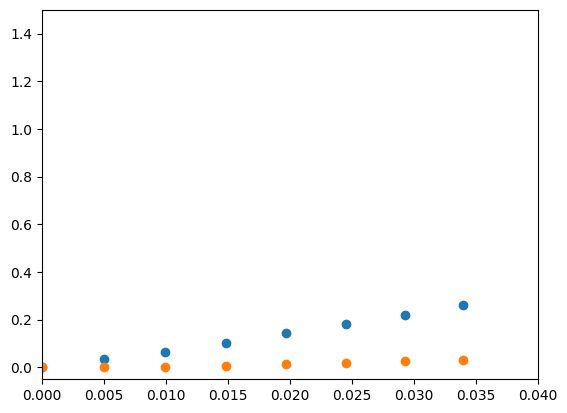

In [64]:
fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410, 14/412]
ys_280 = prot599.iloc[280-190, 1:]
ys_313 = prot599.iloc[312-190, 1:]
print(ys_280)

ax.scatter(xs, ys_280)
ax.scatter(xs, ys_313)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 1.5])
print(xs)

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12, 410/14]
prot_conc_stock = []
for i in range(6):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]
 [0.03398058]]
0.9983067756282185
-0.005878218463477941
H2O         0.478024
prot_2      3.508277
prot_4      6.297690
prot_6      9.589829
prot_8     12.995514
prot_10    16.524577
prot_12    19.775057
prot_14    23.201262
Name: 90, dtype: float64
H2O         0.478024
prot_2      3.508277
prot_4      6.297690
prot_6      9.589829
prot_8     12.995514
prot_10    16.524577
prot_12    19.775057
prot_14    23.201262
Name: 90, dtype: float64
[701.65535765232, 632.9178464336416, 645.7151473403881, 659.5223109375223, 674.2027531118584, 675.6477693057442]
657.6011654258309


8
8
0.9372857159821976
-0.008541227383657365
[1.73737202]


(-0.05, 0.1)

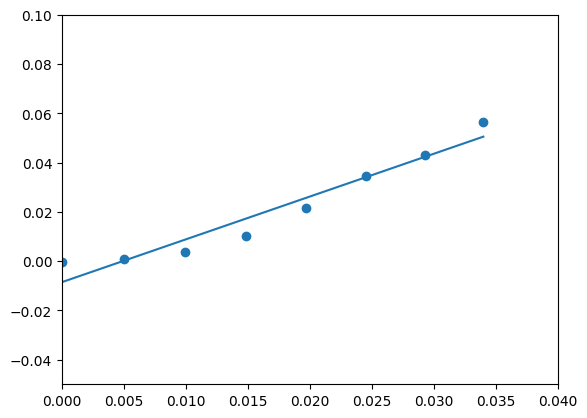

In [79]:
print(len(xs_re))
ys_313 = prot599.iloc[312-190, 1:]
print(len(ys_313))
reg_313 = LinearRegression().fit(xs_re, ys_313)
print(reg_313.score(xs_re, ys_313))
print(reg_313.intercept_)
print(reg_313.coef_)


fig,ax = plt.subplots()
ax.scatter(xs_re, ys_313)
ys_313_pred = np.array([reg_313.predict(np.array(xr).reshape(1, -1)) for xr in xs_re])

ax.plot(xs_re, ys_313_pred)
plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.1])




H2O         0.478024
prot_2      3.508277
prot_4      6.297690
prot_6      9.589829
prot_8     12.995514
prot_10    16.524577
prot_12    19.775057
prot_14    23.201262
Name: 90, dtype: float64
H2O       -0.000236
prot_2     0.001023
prot_4     0.003877
prot_6     0.010029
prot_8     0.021364
prot_10    0.034674
prot_12    0.043057
prot_14    0.056363
Name: 122, dtype: float64
[0.00260447]
-0.008803104235917136


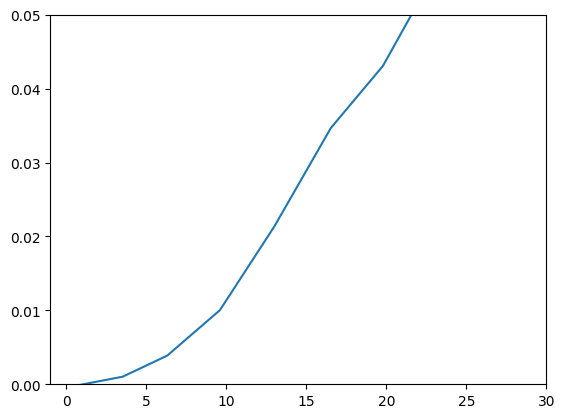

In [80]:
fig,ax = plt.subplots()
reg_prot_313_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_313)
print(prot_conc)
print(ys_313)
ax.plot(prot_conc, ys_313)
plt.xlim([-1, 30])
plt.ylim([0, 0.05])
print(reg_prot_313_conc.coef_)
print(reg_prot_313_conc.intercept_)

real_titri_ys-----------------------------------


(-0.01, 0.1)

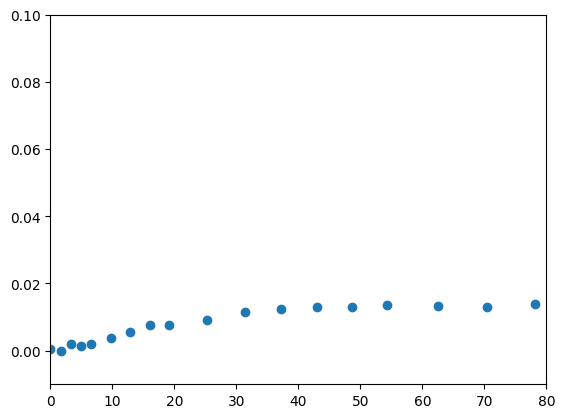

In [83]:
titri_adds = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 42, 48, 54, 60]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*657.6/titri_vols[i] for i in range(len(titri_adds))]
prot_conc_ys = reg_prot_313_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))

vel_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('vel_titri_xs-----------------------------------')
#print(vel_titri_xs)

vel_titri_ys = vel_reg_313.predict(vel_titri_xs)
#print('vel_titri_ys-----------------------------------')
#print(vel_titri_ys)

real_titri_ys = data.iloc[312-190, 9:]
print('real_titri_ys-----------------------------------')
#print(real_titri_ys)

corr_titri_ys = abs(real_titri_ys - vel_titri_ys - prot_conc_ys)
corr_titri_ys = abs(real_titri_ys - vel_titri_ys)

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.01, 0.1])


In [50]:
result = pd.DataFrame({'conc':prot_conc_xs, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/vel_230408_processed.csv')

